## Team 2 - Deliverable 3

This folder contains graphs from our cleaned data using `example.py`

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Read csv file into dataframe
def process(path):
    df = pd.read_csv(path)
    df = df.drop(columns=['Unnamed: 0', 'party_initials', 'party_number', 'place_(zz_=_exterior)'])
#     df = df.rename({'election_year': 'year'}, axis='columns')
    return df

In [11]:
# Read all csv files into df
df1998 = process('election data/1998_Election_processed.csv')
df2002 = process('election data/2002_Election_processed.csv')
df2006 = process('election data/2006_Election_processed.csv')
df2010 = process('election data/2010_Election_processed.csv')
df2014 = process('election data/2014_Election_processed.csv')
df2018 = process('election data/2018_Election_processed.csv')

df = pd.concat([df1998, df2002, df2006, df2010, df2014, df2018], sort=False)
df = df.drop(columns=['unnamed:_4'])
df.to_csv("election data/sum_processed.csv")

In [12]:
df

,election_year,election_round,municipality_code,municipality_name,office,party_name,number_of_votes
0,1998,1,98787,AFRICA DO SUL,PRESIDENTE,PARTIDO SOCIAL DEMOCRATA CRISTAO,1
1,1998,1,98787,AFRICA DO SUL,PRESIDENTE,PARTIDO TRABALHISTA DO BRASIL,3
2,1998,1,98787,AFRICA DO SUL,PRESIDENTE,PARTIDO DOS TRABALHADORES,10
3,1998,1,98787,AFRICA DO SUL,PRESIDENTE,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,54
4,1998,1,11100,ALEMANHA,PRESIDENTE,PARTIDO TRABALHISTA NACIONAL,1
...,...,...,...,...,...,...,...
1534,2018,1,11142,ARGENTINA,Presidente,Podemos,46
1535,2018,1,11266,ESTADOS UNIDOS,Presidente,Partido Patria Livre,4
1536,2018,1,11266,ESTADOS UNIDOS,Presidente,Podemos,39
1537,2018,1,11282,FRANCA,Presidente,Podemos,30


In [13]:
# Function to graph votes for any party
def graphPartyVotes(df, party):
    x = sum_party_votes.Year.values
    oldList = sum_party_votes[party].values
    y =[]
    for i in range(len(oldList) - 1, -1, -1):
        votes = oldList[i]
        if np.isnan(votes) == False:
            y.insert(0,votes)
        else:
            x = np.delete(x, i)

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, y, 'o')
    plt.plot(x, m*x + b)
    plt.xticks(x, x)
    plt.ylim(0, 150000)
    plt.xlabel("Year")
    plt.ylabel("Votes")
    plt.title("Votes for " + party)
    plt.show()

In [74]:
# Given df return list of years and votes for each party in that year
def partyVotingPattern(df, years, parties):
    voting = []
    for year in years:
        rows = []
        for party in parties:
            partyDF = df.loc[df['party_name'] == party]
            partyDF = partyDF.loc[partyDF['election_year'] == year]
            votes = partyDF['number_of_votes'].sum()
            rows.append([party, votes])
        
        voting.append(rows)

    return voting

# Given df return list of years and votes for each municipality in that year
def municipalityVotingPattern(df, years, municipalities):
    voting = []
    for year in years:
        rows = []
        for municipality in municipalities:
            partyDF = df.loc[df['municipality_name'] == municipality]
            partyDF = partyDF.loc[partyDF['election_year'] == year]
            votes = partyDF['number_of_votes'].sum()
            rows.append([municipality, votes])
        
        voting.append(rows)

    return voting

years = list(set(df['election_year']))
years.sort()
parties = list(set(df['party_name']))
party_data = partyVotingPattern(df, years, parties)

municipalities = list(set(df['municipality_name']))
municipality_data = municipalityVotingPattern(df, years, municipalities)
# print(municipality_data)

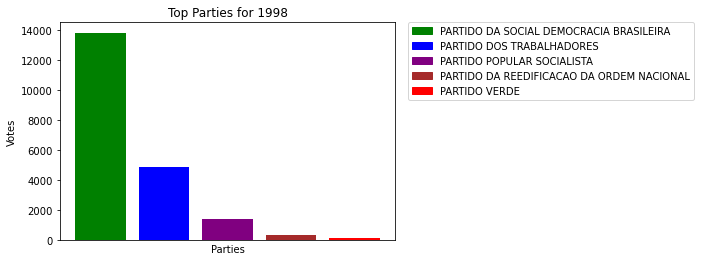

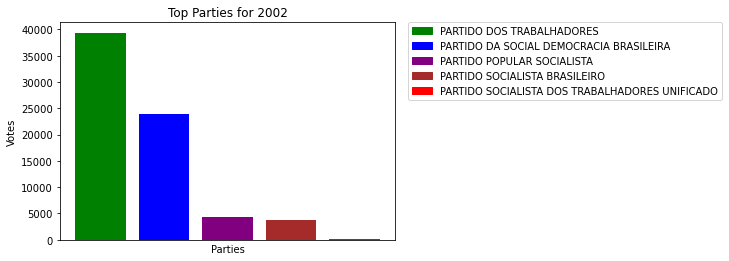

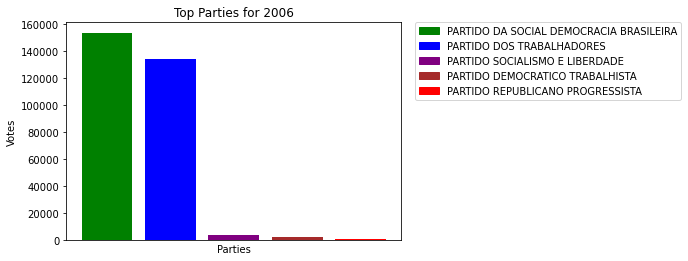

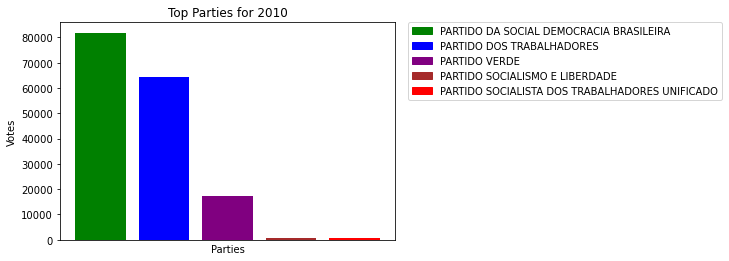

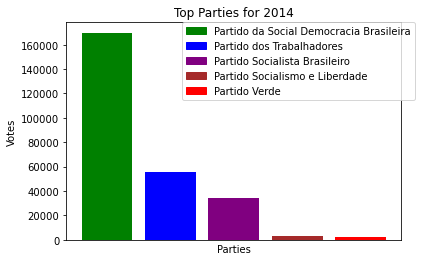

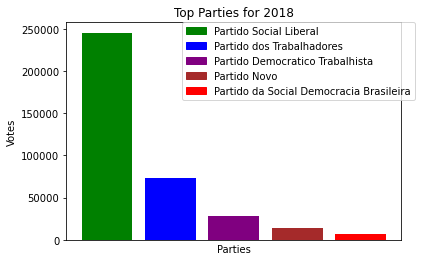

In [72]:
# Graph top parties for each year
def graphPartyVotes(party_data, top, years, parties, year):
    index = years.index(year)
    data = party_data[index]
    
    top_parties = []
    top_votes = []
    for value in data:
        if (len(top_parties) < top):
            top_parties.append(value[0])
            top_votes.append(value[1])
        else:
            top_parties.append(value[0])
            top_votes.append(value[1])
            zipped_lists = zip(top_votes, top_parties)
            sorted_zipped_lists = sorted(zipped_lists, reverse=True)
            top_parties = [element for _, element in sorted_zipped_lists]
            top_votes = [element for element, _ in sorted_zipped_lists]
            top_parties.pop()
            top_votes.pop()
            
    colors = ['green','blue','purple','brown','red']   
    plt.bar(top_parties, top_votes, color=colors)
    plt.xlabel("Parties")
    plt.xticks([], [])
    plt.ylabel("Votes")
    plt.title("Top Parties for " + str(year))
    handles = [plt.Rectangle((0,0),1,1, color=colors[top_parties.index(label)]) for label in top_parties]
    plt.legend(handles, top_parties, bbox_to_anchor=(1.04,1), borderaxespad=0)
    plt.show()

for year in years:
    graphPartyVotes(party_data, 5, years, parties, year)

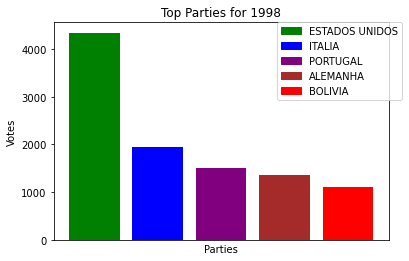

['ESTADOS UNIDOS', 'ITALIA', 'PORTUGAL', 'ALEMANHA', 'BOLIVIA']
[4345, 1940, 1502, 1359, 1115]


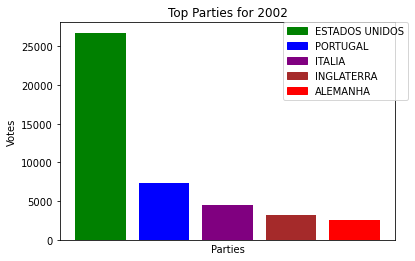

['ESTADOS UNIDOS', 'PORTUGAL', 'ITALIA', 'INGLATERRA', 'ALEMANHA']
[26772, 7343, 4518, 3217, 2584]


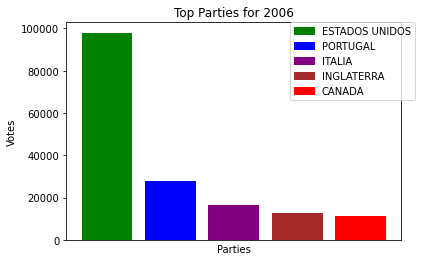

['ESTADOS UNIDOS', 'PORTUGAL', 'ITALIA', 'INGLATERRA', 'CANADA']
[97985, 27822, 16616, 12640, 11214]


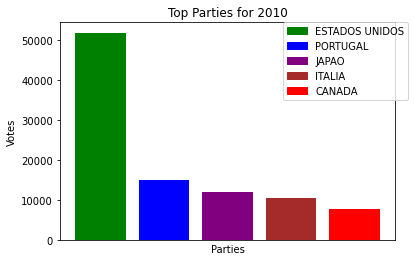

['ESTADOS UNIDOS', 'PORTUGAL', 'JAPAO', 'ITALIA', 'CANADA']
[51820, 15087, 12063, 10564, 7749]


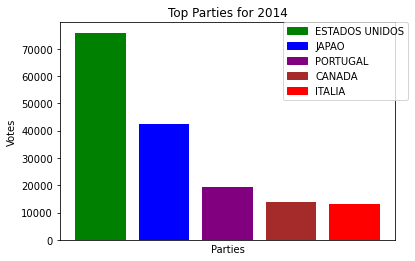

['ESTADOS UNIDOS', 'JAPAO', 'PORTUGAL', 'CANADA', 'ITALIA']
[75862, 42402, 19295, 13819, 12943]


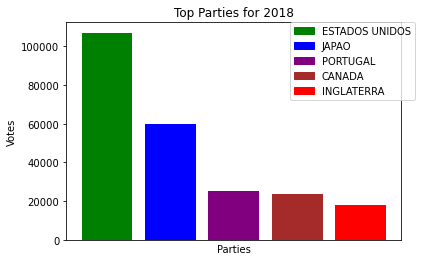

['ESTADOS UNIDOS', 'JAPAO', 'PORTUGAL', 'CANADA', 'INGLATERRA']
[107078, 59676, 24980, 23852, 17848]


In [75]:
# Graph top parties for each year
def graphPartyVotes2(party_data, top, years, parties, year):
    index = years.index(year)
    data = party_data[index]
    
    top_parties = []
    top_votes = []
    for value in data:
        if (len(top_parties) < top):
            top_parties.append(value[0])
            top_votes.append(value[1])
        else:
            top_parties.append(value[0])
            top_votes.append(value[1])
            zipped_lists = zip(top_votes, top_parties)
            sorted_zipped_lists = sorted(zipped_lists, reverse=True)
            top_parties = [element for _, element in sorted_zipped_lists]
            top_votes = [element for element, _ in sorted_zipped_lists]
            top_parties.pop()
            top_votes.pop()
            
    colors = ['green','blue','purple','brown','red']   
    plt.bar(top_parties, top_votes, color=colors)
    plt.xlabel("Parties")
    plt.xticks([], [])
    plt.ylabel("Votes")
    plt.title("Top Parties for " + str(year))
    handles = [plt.Rectangle((0,0),1,1, color=colors[top_parties.index(label)]) for label in top_parties]
    plt.legend(handles, top_parties, bbox_to_anchor=(1.04,1), borderaxespad=0)
    plt.show()
    print(top_parties)
    print(top_votes)

for year in years:
    graphPartyVotes2(municipality_data, 5, years, municipalities, year)